In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.optimize as opt    # for min functions
import matplotlib.pyplot as plt

In [2]:
# winequality-red.csv
data = pd.read_csv("winequality-red.csv", sep=";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
y = data.quality
X = data.drop('quality', axis=1)
(m,n) = X.shape

### Normalize data

In [4]:
def featureNormalize(X):
    X = (X - X.mean())/X.std()
    return X


In [5]:
X = featureNormalize(X)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946
1,-0.298454,1.966827,-1.391037,0.043403,0.223805,0.872365,0.624168,0.028252,-0.719708,0.128910,-0.584594
2,-0.298454,1.296660,-1.185699,-0.169374,0.096323,-0.083643,0.228975,0.134222,-0.331073,-0.048074,-0.584594
3,1.654339,-1.384011,1.483689,-0.453077,-0.264878,0.107558,0.411372,0.664069,-0.978798,-0.461036,-0.584594
4,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946
5,-0.528194,0.738187,-1.391037,-0.524002,-0.264878,-0.274845,-0.196617,0.558100,1.288240,-0.579025,-0.959946
6,-0.241019,0.403103,-1.083031,-0.665853,-0.392360,-0.083643,0.380972,-0.183687,-0.071983,-1.168972,-0.959946
7,-0.585629,0.682339,-1.391037,-0.949556,-0.477348,-0.083643,-0.774207,-1.137414,0.510970,-1.109977,-0.396918
8,-0.298454,0.291408,-1.288368,-0.382151,-0.307372,-0.657248,-0.865405,0.028252,0.316652,-0.520031,-0.866108
9,-0.470759,-0.155370,0.457001,2.525799,-0.349866,0.107558,1.688149,0.558100,0.251880,0.836846,0.072271


### Bias Feature

In [6]:
ones = np.ones((m, 1))
X = np.hstack((ones, X))


### Turning vaules into array

In [7]:
y = np.array(y).reshape(m, 1)
# X is already an array 
# X = np.array(X).reshape(m, n)  

## Using Min function

### Gradient Function

In [8]:
def gradient(theta, X, y):
    return (1 / m) * ((X.T).dot(((X.dot(theta)) - y)))

### Compute Cost

In [33]:
# def computeCost(theta,x, y):
#     y=y.reshape(-1,1)
#     theta = theta.reshape(1,-1)
#     Hyp = x.dot(theta.T)  # multiplying matrices
#     diff = y - Hyp
#     squared = np.square(diff)
#     sumedUp = np.sum(squared)
#     J = sumedUp / (2 * m)
#     return J
def computeCost(theta, X,y):
    tobesummed = np.power(((X @ theta.T)-y),2)
    return np.sum(tobesummed)/(2 * len(X))

In [41]:
# initial_theta =  np.array([[2, 1]])
initial_theta = np.zeros((n+1, 1))
temp = opt.fmin_tnc(func=computeCost,
                    x0=initial_theta.flatten(),
                    fprime=gradient,
                    args=(X, y.flatten()))

# the output of above function is a tuple whose first element contains the optimized values of theta
theta_optimized = temp[0]
J = computeCost(theta_optimized, X, y)
print(theta_optimized)
print(J)

[ 5.63784045  0.0509738  -0.16515906  0.01978959  0.03374401 -0.09077044
  0.0302234  -0.09895671 -0.06961151 -0.02568891  0.15053213  0.25226826]
690.9032344044651


## Using Gradient Descent

### Gradient Descent Function

In [58]:
def gradientDescent(X, y, theta, alpha, iters):
    #same as the other one 
    cost = np.zeros(iters)
    theta_init = theta
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta - y), axis=0)
        cost[i] = computeCostGrad(theta, X, y)
    
    return theta,cost

In [59]:
# diff are the arrays 
# def computeCostGrad(theta,x, y):
#     y=y.reshape(-1,1)
#     Hyp = x.dot(theta.T)  # multiplying matrices
#     diff = y - Hyp
#     squared = np.square(diff)
#     sumedUp = np.sum(squared)
#     J = sumedUp / (2 * m)
#     return J

def computeCostGrad(theta, X,y):
    tobesummed = np.power(((X @ theta)-y),2)
    return np.sum(tobesummed)/(2 * len(X))

In [60]:
data = pd.read_csv("winequality-red.csv", sep=";")

y = data.quality
X = data.drop('quality', axis=1)
(m,n) = X.shape

X = featureNormalize(X)
ones = np.ones((m, 1))
X =np.hstack((ones, X))
y = np.array(y).reshape(m, 1)


alpha = 0.001
num_iters = 1000
theta = np.zeros((n+1, 1))
theta,cost = gradientDescent(X,y,theta,alpha,num_iters)
# # print(theta)

finalCost = computeCostGrad(theta, X,y)
print(finalCost)


# print(cost[0])

267.88715161879327


### Cost Plot 

Text(0.5, 1.0, 'Error vs. Training Epoch')

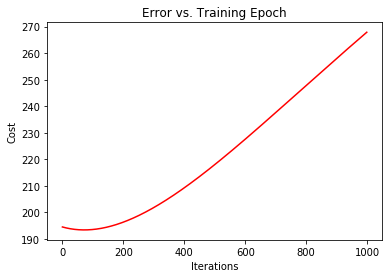

In [61]:
#plot the cost
fig, ax = plt.subplots()  
ax.plot(np.arange(num_iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  

In [69]:
data2 = pd.read_csv("ex1data2.txt", sep=",",header=None)
# data2.head()
X2 = data.iloc[:, 0:2]  # read first two columns into X
y2 = data.iloc[:, 2]  # read the third column into y
(m2,n2) = X2.shape

X2 = featureNormalize(X2)
ones = np.ones((m2, 1))
X2 =np.hstack((ones, X2))
y2 = np.array(y2).reshape(m, 1)

alpha = 0.001
num_iters = 1000
theta = np.zeros((n2+1, 1))


theta, J_history = gradientDescent(X2, y2, theta, alpha, num_iters)
print('Theta computed from gradient descent: ', theta);
finalCost = computeCostGrad(theta, X2,y2)
print(finalCost)


initial_theta = np.zeros((n2+1, 1))
temp = opt.fmin_tnc(func=computeCostGrad,
                    x0=initial_theta.flatten(),
                    fprime=gradient,
                    args=(X2, y2.flatten()))

# the output of above function is a tuple whose first element contains the optimized values of theta
theta_optimized = temp[0]
J = computeCostGrad(theta_optimized, X2, y2)
print(theta_optimized)
print(J)

# #plot the cost
# fig, ax = plt.subplots()  
# ax.plot(np.arange(num_iters), J_history, 'r')  
# ax.set_xlabel('Iterations')  
# ax.set_ylabel('Cost')  
# ax.set_title('Error vs. Training Epoch')  

Theta computed from gradient descent:  [[ 0.17133912  0.09228539 -0.07590743]
 [ 0.17133912  0.09228539 -0.07590743]
 [ 0.17133912  0.09228539 -0.07590743]]
0.1660608492943826


ValueError: shapes (1599,3) and (5,) not aligned: 3 (dim 1) != 5 (dim 0)